# Multiple Qubits

Single qubits, though interesting, are not quite powerful.
To unleash all the potential of a quantum computer, we need to exploit the the way multiple qubits interact with each other.
Notationally, it is quite similar to the single qubit case.

As in the case of 2 qubits:
\begin{equation}
|\psi\rangle = \psi_{00}|00\rangle + \psi_{01}|01\rangle + \psi_{10}|10\rangle + \psi_{11}|11\rangle
= \begin{bmatrix} \psi_{00} \\ \psi_{01} \\ \psi_{10} \\ \psi_{11} \end{bmatrix}
\end{equation}

This can be similarly extended for $n$ number of qubits.
The important and interesting thing to note here is that the size of the statevector grows exponentially with $n$ (equal to $2^n$).

In [1]:
from qiskit import QuantumCircuit
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
qc = QuantumCircuit(2)
qc.initialize([1/2,1/2,1/2,1/2], [0,1])
qc.draw()

┌──────────────────────────────┐
q_0: ┤0                             ├
     │  initialize(0.5,0.5,0.5,0.5) │
q_1: ┤1                             ├
     └──────────────────────────────┘

In [3]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
print(out_state)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


## Tensor Product

When we have the state of the individual qubits in a multiple qubit system, we can represent the combined state of the system by the tensor product of the individual qubits.

For 2 qubits, $a$ and $b$,

\begin{equation}
|a\rangle = a_0|0\rangle + a_1|1\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\
|b\rangle = b_0|0\rangle + b_1|1\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \\
\end{equation}

We can write the combined system as
\begin{equation}
|ab\rangle = |a\rangle \otimes |b\rangle = \begin{bmatrix} a_0 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \\ a_1 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} a_0 b_0 \\ a_0 b_1 \\ a_1 b_0 \\ a_1 b_1 \end{bmatrix} \\
\end{equation}
Or, alternatively as
\begin{equation}
|ab\rangle = a_0|0\rangle \otimes (b_0|0\rangle + b_1|1\rangle) + a_1|1\rangle \otimes (b_0|0\rangle + b_1|1\rangle) \\
|ab\rangle = a_0 b_0|00\rangle + a_0 b_1|01\rangle + a_1 b_0|10\rangle + a_1 b_1|11\rangle
\end{equation}

and this can further be scaled to any number of qubits.

In [4]:
qc2 = QuantumCircuit(2)
qc2.h([0,1])
qc2.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [5]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc2,backend).result()
out_state = result.get_statevector()
print(out_state)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


# Entanglement

We can describe the combined state of a multi-qubit system if we know the state of the constituent sub-systems.
However, there are systems of qubits whose state cannot be described as the tensor product of its constituent sub-systems.
Such systems are called "entangled" in nature.
This property of entanglement is one of the most fundamentally important quantum mechanical property and is exploited a great deal in various of use cases.

For example, let us take the quantum state as described below
\begin{equation}
|\psi\rangle = a|00\rangle + b|11\rangle \\
a,b \neq 0
\end{equation}
This state cannot be expressed as a tensor product of $2$ qubits, and, hence, is an entangled state.

In [6]:
qcE = QuantumCircuit(2)
qcE.initialize([1/2**0.5,0,0,1/2**0.5], [0,1])
qcE.draw()

┌──────────────────────────────────┐
q_0: ┤0                                 ├
     │  initialize(0.70711,0,0,0.70711) │
q_1: ┤1                                 ├
     └──────────────────────────────────┘

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


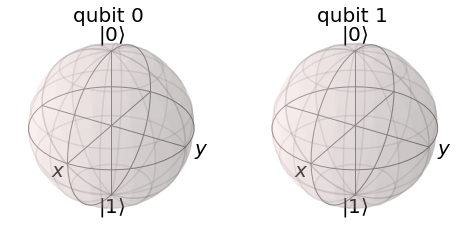

In [7]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qcE,backend).result()
out_state = result.get_statevector()
print(out_state)
plot_bloch_multivector(out_state) # Qubits are Not Separable

## Bell States

A commonly used set of entangled states which are orthogonal to each other is the set of Bell states which is

\begin{equation}
|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}} \\
|\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}} \\
|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}} \\
|\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}
\end{equation}